# LRES

## Questionnaire: Household

In [1]:
#import import_ipynb
#import os
import pandas as pd
import numpy as np
from scipy import stats
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import random
from numpy import random as nprando
from datetime import datetime, date, time, timedelta
import pyreadstat
from matplotlib.ticker import FormatStrFormatter

######################################################################################### 

##SETUP##
sns.set()
nprando.seed(111)
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (12, 8)})
pd.set_option("display.max_columns",None)

##VARIABLES##
hh = "./Data/Household_LRES_Baseline_Anon_V1.0.0.dta"
hh_d = "./Data/hhderived_LRES_Baseline_Anon_V1.0.0.dta"

##IMPORT##
#df_hh = pd.read_stata(hh)
#df_hh_d = pd.read_stata(hh_d)

df_hh , meta = pyreadstat.read_dta(hh, apply_value_formats=True)
df_hh_x , meta_x = pyreadstat.read_dta(hh, apply_value_formats=False)
df_hh_x2 , meta_x = pyreadstat.read_dta(hh, apply_value_formats=True)
df_hh_d , meta_d = pyreadstat.read_dta(hh_d, apply_value_formats=True)

#print(meta.column_names)
#print(meta.column_labels)
#print(meta.column_names_to_labels)
#print(meta.number_rows)
#print(meta.number_columns)
#print(meta.file_label)
#print(meta.file_encoding)

df_hh_x2.columns=meta.column_labels
#df_ind_d.columns=meta_d.column_labels

for each in df_hh_x2.columns:
    print(each)

Household identifier
Claim ID
Interview outcome
Treatment or Control
Type of Claim
Date of interview
Interviewer team
Interviewer code
a4 - Do you consent?
b1 - Dwelling rating by interviewer or respondent?
b2 - Dwelling rating
b3 - Type of dwelling
b3_o - Other: Type of dwelling
b4 - Number of rooms in household
b5_1 - Main material used for roof
b5_2 - Main material used for walls
b5_3 - Main material used for floor
b6 - The household pays rent?
b7 - Amount paid for rent on dwelling each month
b8 - Amount of rent that would be paid each month
b9 - Household member owns the dwelling?
b10 - Property is paid off?
b11 - Amount of bond still owing
b12 - Monthly bond payment
b13 - Does a household member own the land that this dwelling is on?
b14 - On what basis does the household own the land?
b14_o - Other: Basis the household owns the land
b15 - Repairs/improvements on dwelling in past 2 years?
b16 - Value of repairs/improvements on dwelling
b17 - Reasonable market value for property
b1

In [2]:
print("--------" + "\n" + '\033[1m' +"Raw Data: "+ '\033[0m' + 'Household_LRES_Baseline_Anon_V1.0.0.dta' + "\n")
df_hh.describe()
#df_hh.head()

--------
Raw Data: Household_LRES_Baseline_Anon_V1.0.0.dta



,bl_hhid,claim_id,bl_h_outcome,bl_h_treatment,bl_h_claim_type,bl_h_intrv_date,bl_h_intrv_team,bl_h_intrv_code,bl_h_consent,bl_h_dwlratesrc,bl_h_dwlrate,bl_h_dwltyp,bl_h_dwltyp_o,bl_h_dwlrms,bl_h_dwlmatroof,bl_h_dwlmatrwll,bl_h_dwlmatflr,bl_h_rnt,bl_h_rntpay,bl_h_rntpot,bl_h_ownd,bl_h_ownpaid,bl_h_ownowd,bl_h_ownmn,bl_h_ownland,bl_h_ownlandright,bl_h_ownlandright_o,bl_h_dwlrepr,bl_h_dwlrepr_v,bl_h_mrkv,bl_h_sub,bl_h_lndgrn,bl_h_lndrst,bl_h_ownoth,bl_h_ownothtype1,bl_h_ownothtype2,bl_h_ownothtype3,bl_h_mrkvoth,bl_h_ownothpaid,bl_h_ownowdtot,bl_h_ownothdtmnth,bl_h_watsrc,bl_h_watsrc_o,bl_h_watdis,bl_h_toi,bl_h_toishr,bl_h_enrgelec,bl_h_enrgck,bl_h_enrght,bl_h_enrght_o,bl_h_enrglght,bl_h_tellnd,bl_h_telcel,bl_h_refrem,bl_h_strlght,bl_h_nbthmf,bl_h_freqdomvio,bl_h_freqvio,bl_h_freqgang,bl_h_freqmdr,bl_h_freqdrug,bl_h_expnd,bl_h_empl,bl_h_rent,bl_h_grn,bl_h_prvpen,bl_h_tinc,bl_h_tinc_brac1,bl_h_tinc_brac2,bl_h_tinc_brac3,bl_h_tinc_brac4,bl_h_tinc_brac5,bl_h_tinc_brac6,bl_h_tinc_cat,bl_h_incgovpen,bl_h_incgovpen_v,bl_h_incdis,bl_h_incdis_v,bl_h_incchld,bl_h_incchld_v,bl_h_incfos,bl_h_incfos_v,bl_h_inccare,bl_h_inccare_v,bl_h_inco,bl_h_inco_o,bl_h_inco_v,bl_h_cr,bl_h_cr_v,bl_h_crrel1,bl_h_crrel2,bl_h_crrel3,bl_h_crrel4,bl_h_crrel5,bl_h_crrel6,bl_h_crrel7,bl_h_crrel8,bl_h_crrel9,bl_h_crrel10,bl_h_crrel11,bl_h_crrel12,bl_h_crrel13,bl_h_cg,bl_h_cg_v,bl_h_cgrel1,bl_h_cgrel2,bl_h_cgrel3,bl_h_cgrel4,bl_h_cgrel5,bl_h_cgrel6,bl_h_cgrel7,bl_h_cgrel8,bl_h_cgrel9,bl_h_cgrel10,bl_h_cgrel11,bl_h_cgrel12,bl_h_cgrel13,bl_h_fdtot,bl_h_fdtot_brac1,bl_h_fdtot_brac2,bl_h_fdtot_brac3,bl_h_fdtot_brac4,bl_h_fdtot_brac5,bl_h_fdtot_brac6,bl_h_fdtot_cat,bl_h_fdrec,bl_h_fdprd,bl_h_fdcon,bl_h_fdmm,bl_h_fdmmspn,bl_h_fdmmpay,bl_h_fdmmprd,bl_h_fdmmss,bl_h_fdsmp,bl_h_fdsmpspn,bl_h_fdsmppay,bl_h_fdsmpprd,bl_h_fdsmpss,bl_h_fdflr,bl_h_fdflrspn,bl_h_fdflrpay,bl_h_fdflrss,bl_h_fdrice,bl_h_fdricespn,bl_h_fdricepay,bl_h_fdricess,bl_h_fdpas,bl_h_fdpasspn,bl_h_fdpaspay,bl_h_fdpasss,bl_h_fdbis,bl_h_fdbisspn,bl_h_fdbispay,bl_h_fdbisss,bl_h_fdrm,bl_h_fdrmspn,bl_h_fdrmpay,bl_h_fdrmprd,bl_h_fdrmss,bl_h_fdrmc,bl_h_fdrmcspn,bl_h_fdrmcpay,bl_h_fdrmcss,bl_h_fdchi,bl_h_fdchispn,bl_h_fdchipay,bl_h_fdchiprd,bl_h_fdchiss,bl_h_fdfsh,bl_h_fdfshspn,bl_h_fdfshpay,bl_h_fdfshprd,bl_h_fdfshss,bl_h_fdfshc,bl_h_fdfshcspn,bl_h_fdfshcpay,bl_h_fdfshcss,bl_h_fdvegd,bl_h_fdvegdspn,bl_h_fdvegdpay,bl_h_fdvegdprd,bl_h_fdvegdss,bl_h_fdpot,bl_h_fdpotspn,bl_h_fdpotpay,bl_h_fdpotprd,bl_h_fdpotss,bl_h_fdvego,bl_h_fdvegospn,bl_h_fdvegopay,bl_h_fdvegoprd,bl_h_fdvegoss,bl_h_fdfru,bl_h_fdfruspn,bl_h_fdfrupay,bl_h_fdfruprd,bl_h_fdfruss,bl_h_fdoil,bl_h_fdoilspn,bl_h_fdoilpay,bl_h_fdoilss,bl_h_fdmar,bl_h_fdmarspn,bl_h_fdmarpay,bl_h_fdmarprd,bl_h_fdmarss,bl_h_fdpb,bl_h_fdpbspn,bl_h_fdpbpay,bl_h_fdpbprd,bl_h_fdpbss,bl_h_fdmlk,bl_h_fdmlkspn,bl_h_fdmlkpay,bl_h_fdmlkprd,bl_h_fdmlkss,bl_h_fdegg,bl_h_fdeggspn,bl_h_fdeggpay,bl_h_fdeggprd,bl_h_fdeggss,bl_h_fdsug,bl_h_fdsugspn,bl_h_fdsugpay,bl_h_fdsugprd,bl_h_fdsugss,bl_h_fdsd,bl_h_fdsdspn,bl_h_fdsdpay,bl_h_fdsdss,bl_h_fdfrut,bl_h_fdfrutspn,bl_h_fdfrutpay,bl_h_fdfrutss,bl_h_fdcer,bl_h_fdcerspn,bl_h_fdcerpay,bl_h_fdcerss,bl_h_fdbaby,bl_h_fdbabyspn,bl_h_fdbabypay,bl_h_fdbabyss,bl_h_fdslt,bl_h_fdsltspn,bl_h_fdsltpay,bl_h_fdsltprd,bl_h_fdsltss,bl_h_fdsoy,bl_h_fdsoyspn,bl_h_fdsoypay,bl_h_fdsoyss,bl_h_fdcof,bl_h_fdcofspn,bl_h_fdcofpay,bl_h_fdcofprd,bl_h_fdcofss,bl_h_fdhmp,bl_h_fdhmpspn,bl_h_fdhmppay,bl_h_fdhmpss,bl_h_fdrdy,bl_h_fdrdyspn,bl_h_fdrdypay,bl_h_fdrdyss,bl_h_fdout,bl_h_fdoutspn,bl_h_fdoutpay,bl_h_fdoutss,bl_h_fdo,bl_h_fdospn,bl_h_fdopay,bl_h_fdoss,bl_h_fayn,bl_h_faaskp,bl_h_faad,bl_h_facskp,bl_h_facd,bl_h_falp,bl_h_fabor,bl_h_fagath,bl_h_fabeg,bl_h_fatwo,bl_h_facont,bl_h_faprot,bl_h_fatom,bl_h_nfcig,bl_h_nfcigspn,bl_h_nfalc,bl_h_nfalcspn,bl_h_nfent,bl_h_nfentspn,bl_h_nfspr,bl_h_nfsprspn,bl_h_nfper,bl_h_nfperspn,bl_h_nfjew,bl_h_nfjewspn,bl_h_nfpap,bl_h_nfpapspn,bl_h_nfcel,bl_h_nfcelspn,bl_h_nftel,bl_h_nftelspn,bl_h_nflot,bl_h_nflotspn,bl_h_nfnet,bl_h_nfnetspn,bl_h_nftrp,b

In [3]:
print("--------" + "\n" + '\033[1m' +"Derived Data: "+ '\033[0m' + 'hhderived_LRES_Baseline_Anon_V1.0.0.dta' + "\n")
df_hh_d.describe(exclude=[np.number])
#df_hh_d.head()

--------
Derived Data: hhderived_LRES_Baseline_Anon_V1.0.0.dta



,claim_id,bl_hhid,bl_hd_prov2011,bl_hd_prov2001,bl_hd_geo2011,bl_hd_geo2001,bl_hd_dc2011,bl_hd_dc2001,bl_hd_hhsizer,bl_hd_hhcsm,bl_hd_hhncsm,bl_hd_expf,bl_hd_expf_flg,bl_hd_expnf,bl_hd_expnf_flg,bl_hd_rentexpend,bl_hd_rentexpend_flg,bl_hd_expenditure,bl_hd_fdmmspn,bl_hd_fdmmspn_flg,bl_hd_fdsmpspn,bl_hd_fdsmpspn_flg,bl_hd_fdflrspn,bl_hd_fdflrspn_flg,bl_hd_fdricespn,bl_hd_fdricespn_flg,bl_hd_fdpasspn,bl_hd_fdpasspn_flg,bl_hd_fdbisspn,bl_hd_fdbisspn_flg,bl_hd_fdrmspn,bl_hd_fdrmspn_flg,bl_hd_fdrmcspn,bl_hd_fdrmcspn_flg,bl_hd_fdchispn,bl_hd_fdchispn_flg,bl_hd_fdfshspn,bl_hd_fdfshspn_flg,bl_hd_fdfshcspn,bl_hd_fdfshcspn_flg,bl_hd_fdvegdspn,bl_hd_fdvegdspn_flg,bl_hd_fdpotspn,bl_hd_fdpotspn_flg,bl_hd_fdvegospn,bl_hd_fdvegospn_flg,bl_hd_fdfruspn,bl_hd_fdfruspn_flg,bl_hd_fdoilspn,bl_hd_fdoilspn_flg,bl_hd_fdmarspn,bl_hd_fdmarspn_flg,bl_hd_fdpbspn,bl_hd_fdpbspn_flg,bl_hd_fdmlkspn,bl_hd_fdmlkspn_flg,bl_hd_fdeggspn,bl_hd_fdeggspn_flg,bl_hd_fdsugspn,bl_hd_fdsugspn_flg,bl_hd_fdsdspn,bl_hd_fdsdspn_flg,bl_hd_fdfrutspn,bl_hd_fdfrutspn_flg,bl_hd_fdcerspn,bl_hd_fdcerspn_flg,bl_hd_fdbabyspn,bl_hd_fdbabyspn_flg,bl_hd_fdsltspn,bl_hd_fdsltspn_flg,bl_hd_fdsoyspn,bl_hd_fdsoyspn_flg,bl_hd_fdcofspn,bl_hd_fdcofspn_flg,bl_hd_fdhmpspn,bl_hd_fdhmpspn_flg,bl_hd_fdrdyspn,bl_hd_fdrdyspn_flg,bl_hd_fdoutspn,bl_hd_fdoutspn_flg,bl_hd_fdospn,bl_hd_fdospn_flg,bl_hd_nfcigspn,bl_hd_nfcigspn_flg,bl_hd_nfalcspn,bl_hd_nfalcspn_flg,bl_hd_nfentspn,bl_hd_nfentspn_flg,bl_hd_nfsprspn,bl_hd_nfsprspn_flg,bl_hd_nfperspn,bl_hd_nfperspn_flg,bl_hd_nfjewspn,bl_hd_nfjewspn_flg,bl_hd_nfpapspn,bl_hd_nfpapspn_flg,bl_hd_nfcelspn,bl_hd_nfcelspn_flg,bl_hd_nftelspn,bl_hd_nftelspn_flg,bl_hd_nflotspn,bl_hd_nflotspn_flg,bl_hd_nfnetspn,bl_hd_nfnetspn_flg,bl_hd_nftrpspn,bl_hd_nftrpspn_flg,bl_hd_nfcerspn,bl_hd_nfcerspn_flg,bl_hd_nfcarspn,bl_hd_nfcarspn_flg,bl_hd_nfpetrspn,bl_hd_nfpetrspn_flg,bl_hd_nftranspn,bl_hd_nftranspn_flg,bl_hd_nfwatspn,bl_hd_nfwatspn_flg,bl_hd_nfelespn,bl_hd_nfelespn_flg,bl_hd_nfenespn,bl_hd_nfenespn_flg,bl_hd_nfmunspn,bl_hd_nfmunspn_flg,bl_hd_nflevspn,bl_hd_nflevspn_flg,bl_hd_nfinslspn,bl_hd_nfinslspn_flg,bl_hd_nfinsfspn,bl_hd_nfinsfspn_flg,bl_hd_nfinseduspn,bl_hd_nfinseduspn_flg,bl_hd_nfinsshspn,bl_hd_nfinsshspn_flg,bl_hd_nfkitspn,bl_hd_nfkitspn_flg,bl_hd_nfdwlspn,bl_hd_nfdwlspn_flg,bl_hd_nfbedspn,bl_hd_nfbedspn_flg,bl_hd_nfmatspn,bl_hd_nfmatspn_flg,bl_hd_nfhpspn,bl_hd_nfhpspn_flg,bl_hd_nffrnspn,bl_hd_nffrnspn_flg,bl_hd_nfclthspn,bl_hd_nfclthspn_flg,bl_hd_nfclthaspn,bl_hd_nfclthaspn_flg,bl_hd_nfclthmspn,bl_hd_nfclthmspn_flg,bl_hd_nfmedaidspn,bl_hd_nfmedaidspn_flg,bl_hd_nfdocspn,bl_hd_nfdocspn_flg,bl_hd_nfhspspn,bl_hd_nfhspspn_flg,bl_hd_nfmedspn,bl_hd_nfmedspn_flg,bl_hd_nftradspn,bl_hd_nftradspn_flg,bl_hd_nfhomspn,bl_hd_nfhomspn_flg,bl_hd_nfschfeespn,bl_hd_nfschfeespn_flg,bl_hd_nfschstatspn,bl_hd_nfschstatspn_flg,bl_hd_nfschunispn,bl_hd_nfschunispn_flg,bl_hd_nfschospn,bl_hd_nfschospn_flg,bl_hd_nfwshspn,bl_hd_nfwshspn_flg,bl_hd_nfchldspn,bl_hd_nfchldspn_flg,bl_hd_nfrelspn,bl_hd_nfrelspn_flg,bl_hd_nfdomspn,bl_hd_nfdomspn_flg,bl_hd_nfswimspn,bl_hd_nfswimspn_flg,bl_hd_nfpetsspn,bl_hd_nfpetsspn_flg,bl_hd_nftoysspn,bl_hd_nftoysspn_flg,bl_hd_nfgftsspn,bl_hd_nfgftsspn_flg,bl_hd_nflobspn,bl_hd_nflobspn_flg
count,654,654,654,654,654,654,654,654,654,654,654,654.0,654,654.0,654,120.0,120,654.0,529.0,529,360.0,361,610.0,610,610.0,610,455.0,456,369.0,369,479.0,479,80.0,89,635.0,636,250.0,251,430.0,430,357.0,357,618.0,618,617.0,617,465.0,465,617.0,617,555.0,555,427.0,427,589.0,589,580.0,580,606.0,606,510.0,511,94.0,113,472.0,473,62.0,72,557.0,557,62.0,78,598.0,598,41.0,54,76.0,95,192.0,192,35.0,42,206.0,207,190.0,193,306.0,306,35.0,42,475.0,475,5.0,5,93.0,98,531.0,531,53.0,60,43.0,50,74.0,84,17.0,18,17.0,21,66.0,83,232.0,233,327.0,327,279.0,280,564.0,565,164.0,164,185.0,186,19.0,25,154.0,154,489.0,489,31.0,31,72.0,84,18.0,23,44.0,48,21.0,23,3.0,3,8.0,9,9.0,10,97.0,109,120.0,120,6.0,8,141.0,141,54.0,63,21.0,28,69.0,75,4.0,4,1.0,1,65.0,71,14.0,15,21.0,22,29.0,31,524.0,524,91.0,98,138.0,138,53

In [4]:
df_hh_d_0 = df_hh_d.iloc[:, 0:10]
df_hh_1 = pd.merge(df_hh_d_0,df_hh, how='outer', left_on=["claim_id","bl_hhid"],right_on=["claim_id","bl_hhid"])
#df_hh_1.describe(include='all')

In [5]:
df_hh_0 = df_hh.iloc[:, 0:6]
df_hh_d_1 = pd.merge(df_hh_0,df_hh_d, how='outer', left_on=["claim_id","bl_hhid"],right_on=["claim_id","bl_hhid"])
#df_hh_d_1.describe(include='all')

#### SAMPLE

In [6]:
#df_ru = pd.get_dummies(df_edu_0, prefix='',prefix_sep='', columns=['bl_id_best_edu'])
df_s_0=df_hh_d[['bl_hd_prov2011', 'bl_hd_geo2011']]
df_s = pd.get_dummies(df_s_0, prefix='',prefix_sep='', columns=['bl_hd_geo2011'])
df_s_g = df_s.groupby(['bl_hd_prov2011']).sum()
df_s_g =df_s_g.drop('Missing')
df_s_g

,Farms,Missing,Traditional,Urban
bl_hd_prov2011,,,,
Eastern Cape,2,0,92,104
Gauteng,0,0,6,81
KwaZulu-Natal,0,0,1,12
Limpopo,0,0,6,0
Mpumalanga,7,0,22,60
North West,0,0,3,0
Western Cape,3,0,0,247


In [7]:
#df_s_ct1 = pd.crosstab(index=df_s_0['bl_hd_geo2011'], columns=df_s_0['bl_hd_prov2011'], rownames=[""], colnames=[""],  margins=True, margins_name="Total")
#df_s_ct1

df_s_ct2 = pd.crosstab(index=df_s_0['bl_hd_geo2011'], columns=df_s_0['bl_hd_prov2011'], rownames=[""], colnames=[""],  margins=True, margins_name="Total", normalize=True)
df_s_ct2.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

,Eastern Cape,Gauteng,KwaZulu-Natal,Limpopo,Missing,Mpumalanga,North West,Western Cape,Total
,,,,,,,,,
Farms,0.31%,0.00%,0.00%,0.00%,0.00%,1.07%,0.00%,0.46%,1.83%
Missing,0.00%,0.00%,0.00%,0.00%,1.22%,0.00%,0.00%,0.00%,1.22%
Traditional,14.07%,0.92%,0.15%,0.92%,0.00%,3.36%,0.46%,0.00%,19.88%
Urban,15.90%,12.39%,1.83%,0.00%,0.00%,9.17%,0.00%,37.77%,77.06%
Total,30.28%,13.30%,1.99%,0.92%,1.22%,13.61%,0.46%,38.23%,100.00%


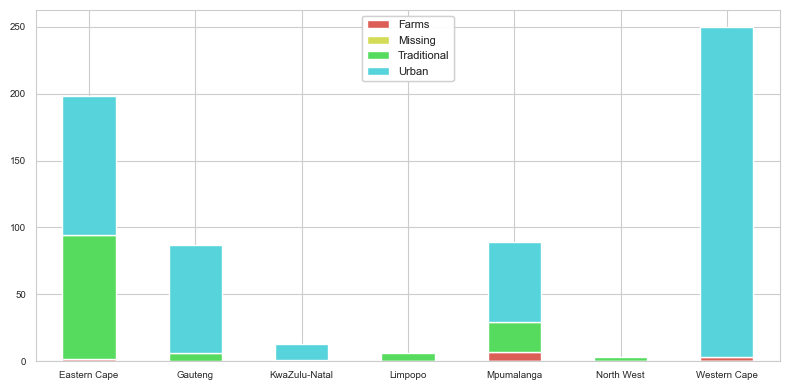

In [8]:
plt.rcParams["figure.figsize"]=[8,4]
sns.set_palette("hls")
plt.rcParams["figure.autolayout"] =True
sns.set_style("whitegrid")
ax = df_s_g.plot.bar(stacked=True)
#ax = df_emp_g.plot.bar(stacked=True,grid=True, table=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
plt.title('', fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=7,rotation='horizontal')
plt.yticks(fontsize=7)
#plt.xlabel('')
#plt.ylabel('')
##legends
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(loc='upper center', fontsize=8)
plt.gca().add_artist(col_lgd)

#Table
'''tableRowLength = len(df_s_g.columns)
tableColLength = len(df_s_g.index)
cellWidth = table.get_celld()[(1,1)].get_width()
cellHeight = table.get_celld()[(1,1)].get_height()
for cIx in range(0, tableColLength):
    c= table.add_cell(tableRowLength + 1, cIx, cellWidth, cellHeight)
    c.set
    c.get_text().set_text(df_s_g.iloc[cIx].sum())'''

    
plt.savefig("hh_sample.svg")
plt.show()


---------------------------------------------------------------
#### HOUSEHOLD LIVING STANDARD

In [9]:
df_dwl=df_hh_1[["claim_id","bl_hhid",'bl_hd_prov2011', 'bl_h_dwltyp']]
df_dwlp_ct = pd.crosstab(index=df_dwl['bl_h_dwltyp'], columns=df_dwl['bl_hd_prov2011'], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_dwltyp')]  + "\n")
df_dwlp_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

--------
Question: b3 - Type of dwelling



,Eastern Cape,Gauteng,KwaZulu-Natal,Limpopo,Missing,Mpumalanga,North West,Western Cape,Total
,,,,,,,,,
Dwelling/house or brick structure on a separate stand or yard or on farm,18.65%,10.09%,1.22%,0.92%,1.07%,12.23%,0.31%,26.91%,71.41%
Dwelling/house/flat/room in backyard,2.60%,0.46%,0.00%,0.00%,0.00%,0.00%,0.00%,1.83%,4.89%
Flat or apartment in a block of flats,1.53%,1.53%,0.61%,0.00%,0.00%,0.46%,0.00%,2.75%,6.88%
Informal dwelling/shack in backyard,1.22%,0.46%,0.15%,0.00%,0.00%,0.00%,0.15%,2.14%,4.13%
Informal dwelling/shack not in backyard,1.83%,0.15%,0.00%,0.00%,0.00%,0.76%,0.00%,0.76%,3.52%
Other (specify),0.15%,0.15%,0.00%,0.00%,0.00%,0.00%,0.00%,0.31%,0.61%
Room/flatlet,0.15%,0.31%,0.00%,0.00%,0.00%,0.00%,0.00%,0.15%,0.61%
"Town/cluster/semi-detached house (simplex, duplex or triplex)",0.15%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,2.75%,2.91%
Traditional dwelling/hut/structure made of traditional materials,3.98%,0.15%,0.00%,0.00%,0.00%,0.15%,0.00%,0.61%,4.89%


In [10]:
df_dwl_d = pd.get_dummies(df_dwl, prefix='',prefix_sep='', columns=['bl_h_dwltyp'])

df_dwl_d['Formal dwelling'] = df_dwl_d[["Dwelling/house or brick structure on a separate stand or yard or on farm", "Flat or apartment in a block of flats", "Town/cluster/semi-detached house (simplex, duplex or triplex)", "Dwelling/house/flat/room in backyard", "Room/flatlet", 'Unit in retirement village']].sum(axis=1)
df_dwl_d['Informal dwelling'] = df_dwl_d[["Informal dwelling/shack in backyard", "Informal dwelling/shack not in backyard", "Traditional dwelling/hut/structure made of traditional materials"]].sum(axis=1)
df_dwl_d['Other dwelling'] = df_dwl_d['Other (specify)']
df_dwl_d_g = df_dwl_d[['Formal dwelling', 'Informal dwelling', 'Other dwelling','bl_hd_prov2011']].groupby(['bl_hd_prov2011']).sum()
df_dwl_d_g = df_dwl_d_g.drop('Missing')
#df_dwl_d= df_dwl_d.reset_index(drop=False)

df_dwl_long = pd.melt(df_dwl_d, id_vars=['bl_hd_prov2011'], value_vars=['Formal dwelling', 'Informal dwelling', 'Other dwelling'])
#df_dwl_long = df_dwl_long.set_index('bl_hd_prov2011').drop("Missing").reset_index()
#df_dwl_long

In [11]:
df_dwl_long_pt = pd.pivot_table(df_dwl_long, index=['variable'], columns=['bl_hd_prov2011'], values='value', aggfunc=np.sum, margins=True, margins_name="Total")
df_dwl_long_pt 

bl_hd_prov2011,Eastern Cape,Gauteng,KwaZulu-Natal,Limpopo,Missing,Mpumalanga,North West,Western Cape,Total
variable,,,,,,,,,
Formal dwelling,151,81,12,6,8,83,2,225,568
Informal dwelling,46,5,1,0,0,6,1,23,82
Other dwelling,1,1,0,0,0,0,0,2,4
Total,198,87,13,6,8,89,3,250,654


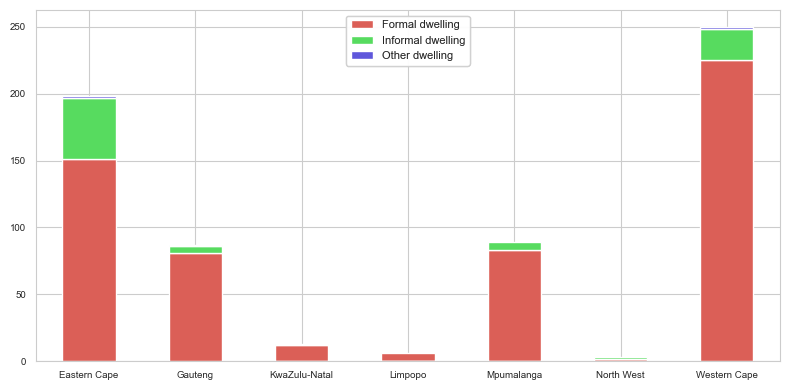

In [12]:
#

sns.set_palette("hls",3)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[8,4]
sns.set_style("whitegrid")
ax = df_dwl_d_g.plot.bar(stacked=True)
#ax = df_emp_g.plot.bar(stacked=True,grid=True, table=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
plt.title('', fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=7,rotation='horizontal')
plt.yticks(fontsize=7)

##legends
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(loc='upper center', fontsize=8)
plt.gca().add_artist(col_lgd)

#Table
'''tableRowLength = len(df_dwl_d_g.columns)
tableColLength = len(df_dwl_d_g.index)
cellWidth = table.get_celld()[(1,1)].get_width()
cellHeight = table.get_celld()[(1,1)].get_height()
for cIx in range(0, tableColLength):
    c= table.add_cell(tableRowLength + 1, cIx, cellWidth, cellHeight)
    c.set
    c.get_text().set_text(df_dwl_d_g.iloc[cIx].sum())'''

    
plt.savefig("hh_dwelling_1.svg")
plt.show()

plt.close()




In [13]:
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_ownd')]  + "\n")

df_own=df_hh[['bl_h_ownd']]
df_own_g = df_own.groupby(['bl_h_ownd']).value_counts().rename('count').reset_index()
df_own_g['pct'] = df_own_g['count']/sum(df_own_g['count'])*100
#df_trs_x_g = df_trs_x_g.drop([0,2])
df_own_g

--------
Question: b9 - Household member owns the dwelling?



,bl_h_ownd,count,pct
0,Don't know,3,0.458716
1,No,158,24.159021
2,Refused,1,0.152905
3,Yes,492,75.229358


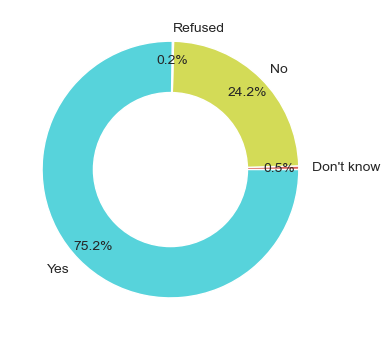

In [14]:
colors =sns.color_palette("hls")[0:5]
labels = df_own_g['bl_h_ownd'].to_list()
explodes= (0.05,0.05)

#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,4]
sns.set_style("whitegrid")

plt.pie(df_own_g['pct'], labels=labels,colors=colors,  pctdistance=0.85, autopct='%.1f%%')

centre = plt.Circle((0,0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)#plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.title(['Treatment', 'Control'])
#plt.suptitle('Gender', fontsize=14)
plt.xlabel('')
#plt.ylabel('')
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.gca().add_artist(col_lgd)
plt.savefig("hh_own.svg")
plt.show()

plt.close()

In [15]:
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_sub')]  + "\n")

df_sub=df_hh[['bl_h_sub']]
df_sub_g = df_sub.groupby(['bl_h_sub']).value_counts().rename('count').reset_index()
df_sub_g['pct'] = df_sub_g['count']/sum(df_sub_g['count'])*100
#df_trs_x_g = df_trs_x_g.drop([0,2])
df_sub_g

--------
Question: b18 - Household was a recipient of government housing subsidy?



,bl_h_sub,count,pct
0,Don't know,7,1.070336
1,No,538,82.262997
2,Refused,3,0.458716
3,Yes,106,16.207951


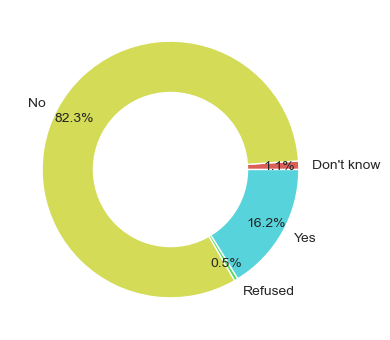

In [16]:
#
colors =sns.color_palette("hls")[0:5]
labels = df_sub_g['bl_h_sub'].to_list()
explodes= (0.05,0.05)

#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,4]
sns.set_style("whitegrid")

plt.pie(df_sub_g['pct'], labels=labels,colors=colors,  pctdistance=0.85, autopct='%.1f%%')

centre = plt.Circle((0,0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)#plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.title(['Treatment', 'Control'])
#plt.suptitle('Gender', fontsize=14)
plt.xlabel('')
#plt.ylabel('')
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.gca().add_artist(col_lgd)
plt.savefig("hh_subsidy.svg")
plt.show()

plt.close()

In [17]:
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_lndgrn')]  + "\n")

df_lgr=df_hh[['bl_h_lndgrn']]
df_lgr_g = df_lgr.groupby(['bl_h_lndgrn']).value_counts().rename('count').reset_index()
df_lgr_g['pct'] = df_lgr_g['count']/sum(df_lgr_g['count'])*100
#df_trs_x_g = df_trs_x_g.drop([0,2])
df_lgr_g

--------
Question: b19 - Household was a recipient of government land grant?



,bl_h_lndgrn,count,pct
0,Don't know,4,0.611621
1,No,633,96.788991
2,Refused,1,0.152905
3,Yes,16,2.446483


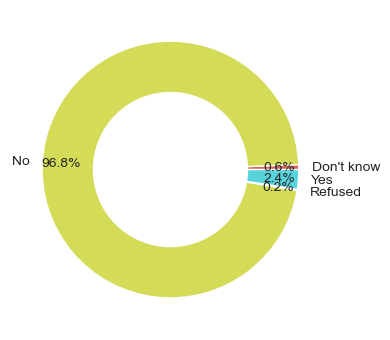

In [18]:
#
colors =sns.color_palette("hls")[0:5]
labels = df_lgr_g['bl_h_lndgrn'].to_list()
explodes= (0.05,0.05)

#plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[4,4]
sns.set_style("whitegrid")

plt.pie(df_lgr_g['pct'], labels=labels,colors=colors,  pctdistance=0.85, autopct='%.1f%%')

centre = plt.Circle((0,0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)#plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.title(['Treatment', 'Control'])
#plt.suptitle('Gender', fontsize=14)
plt.xlabel('')
#plt.ylabel('')
##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
#plt.gca().add_artist(col_lgd)
plt.savefig("hh_landgrant.svg")
plt.show()

plt.close()

In [19]:
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_lndrst')]  + "\n")

df_lgr=df_hh[['bl_h_lndrst']]
df_lgr_g = df_lgr.groupby(['bl_h_lndrst']).value_counts().rename('count').reset_index()
df_lgr_g['pct'] = df_lgr_g['count']/sum(df_lgr_g['count'])*100
#df_trs_x_g = df_trs_x_g.drop([0,2])
df_lgr_g

--------
Question: b20 - Household received land via the land restitution process?



,bl_h_lndrst,count,pct
0,Don't know,3,0.458716
1,No,639,97.706422
2,Refused,2,0.305810
3,Yes,10,1.529052


In [20]:
df_wtr=df_hh_1[["claim_id","bl_hhid",'bl_hd_prov2011', 'bl_h_watsrc']]
df_wtr_ct = pd.crosstab(index=df_wtr['bl_h_watsrc'], columns=df_wtr['bl_hd_prov2011'], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_watsrc')]  + "\n")
df_wtr_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

--------
Question: b27 - Household's main water source



,Eastern Cape,Gauteng,KwaZulu-Natal,Limpopo,Missing,Mpumalanga,North West,Western Cape,Total
,,,,,,,,,
Borehole on site,0.00%,0.00%,0.00%,0.31%,0.00%,0.31%,0.00%,0.31%,0.92%
Dam/pool/stagnant water,1.07%,0.00%,0.00%,0.00%,0.00%,0.15%,0.00%,0.00%,1.22%
Flowing water/stream,0.92%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.92%
Other (specify),0.00%,0.00%,0.00%,0.15%,0.00%,0.15%,0.00%,0.46%,0.76%
Piped (tap) water in dwelling,10.24%,9.79%,1.53%,0.00%,0.61%,4.74%,0.31%,34.56%,61.77%
Piped (tap) water on site or in yard,7.03%,3.36%,0.31%,0.00%,0.31%,7.34%,0.00%,2.14%,20.49%
Public tap,7.65%,0.15%,0.15%,0.46%,0.31%,0.61%,0.15%,0.76%,10.24%
Rain-water tank on site,1.83%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.83%
Water-carrier/tanker,1.38%,0.00%,0.00%,0.00%,0.00%,0.31%,0.00%,0.00%,1.68%


In [21]:
df_toi=df_hh_1[["claim_id","bl_hhid",'bl_hd_prov2011', 'bl_h_toi']]
df_toi_ct = pd.crosstab(index=df_toi['bl_h_toi'], columns=df_toi['bl_hd_prov2011'], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_toi')]  + "\n")
df_toi_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

--------
Question: b29 - Type of toilet facility available to household



,Eastern Cape,Gauteng,KwaZulu-Natal,Limpopo,Missing,Mpumalanga,North West,Western Cape,Total
,,,,,,,,,
Bucket toilet,3.52%,0.31%,0.00%,0.15%,0.15%,0.46%,0.00%,0.76%,5.35%
Chemical toilet,0.46%,0.00%,0.15%,0.00%,0.00%,0.00%,0.00%,0.46%,1.07%
Flush toilet with offsite disposal,3.67%,2.75%,0.15%,0.00%,0.31%,2.45%,0.00%,8.56%,17.89%
Flush toilet with onsite disposal (septic tank/soak-away),8.72%,9.17%,1.53%,0.15%,0.61%,4.74%,0.31%,27.98%,53.21%
None,0.61%,0.00%,0.00%,0.00%,0.00%,0.31%,0.00%,0.31%,1.22%
Pit latrine with ventilation pipe (VIP),5.20%,0.76%,0.00%,0.00%,0.00%,2.91%,0.00%,0.15%,9.02%
Pit latrine without ventilation pipe,8.10%,0.31%,0.15%,0.61%,0.15%,2.75%,0.15%,0.00%,12.23%
Total,30.28%,13.30%,1.99%,0.92%,1.22%,13.61%,0.46%,38.23%,100.00%


In [22]:
df_enrg=df_hh_1[["claim_id","bl_hhid",'bl_hd_prov2011', 'bl_h_enrglght']]
df_enrg_ct = pd.crosstab(index=df_enrg['bl_h_enrglght'], columns=[df_enrg['bl_hd_prov2011']], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_enrglght')]  + "\n")
df_enrg_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

--------
Question: b32_3 - Household's main source of energy/fuel for lighting



,Eastern Cape,Gauteng,KwaZulu-Natal,Limpopo,Missing,Mpumalanga,North West,Western Cape,Total
,,,,,,,,,
Candles,1.68%,0.31%,0.00%,0.15%,0.15%,0.76%,0.00%,0.00%,3.06%
Electricity from generator,0.00%,0.00%,0.00%,0.00%,0.00%,0.15%,0.00%,0.15%,0.31%
Electricity from mains,27.37%,12.69%,1.99%,0.61%,1.07%,12.54%,0.46%,37.61%,94.34%
Paraffin,1.22%,0.31%,0.00%,0.15%,0.00%,0.00%,0.00%,0.46%,2.14%
Solar energy,0.00%,0.00%,0.00%,0.00%,0.00%,0.15%,0.00%,0.00%,0.15%
Total,30.28%,13.30%,1.99%,0.92%,1.22%,13.61%,0.46%,38.23%,100.00%


In [23]:
df_acc_0 = df_hh_1[["claim_id","bl_hhid",'bl_hd_prov2011','bl_h_watsrc', 'bl_h_toi', 'bl_h_enrglght']]
df_acc = pd.get_dummies(df_acc_0, prefix='',prefix_sep='', columns=['bl_h_watsrc', 'bl_h_toi', 'bl_h_enrglght'])
#df_acc

In [24]:
df_acc = df_acc.rename(columns={"Flush toilet with onsite disposal (septic tank/soak-away)":"Flush toilet in dwelling"})

df_acc_long = pd.melt(df_acc, id_vars=['claim_id','bl_hhid','bl_hd_prov2011'], value_vars=['Piped (tap) water in dwelling','Flush toilet in dwelling','Electricity from mains'])


df_acc_g = df_acc[['Piped (tap) water in dwelling','Flush toilet in dwelling','Electricity from mains','bl_hd_prov2011']].groupby(['bl_hd_prov2011']).sum()

'''df_acc_long_g = df_acc_long[['variable','value','bl_hd_prov2011']].groupby(['bl_hd_prov2011', 'variable']).sum()
df_acc_long_g = df_acc_long_g.drop("Missing").reset_index()
df_acc_long_g = df_acc_long_g.rename(columns={"variable":"Q:"})
df_acc_long_g

#df_lgr=df_hh[['bl_h_lndgrn']]
#df_lgr_g = df_acc_long_g.groupby(['bl_hd_prov2011','Q:']).value_counts().rename('count').reset_index()
no_obs = len(df_acc['Piped (tap) water in dwelling'])
#print(no_obs)
df_acc_long_g['pct'] = df_acc_long_g['value']/no_obs*100
df_acc_long_g=df_acc_long_g[['bl_hd_prov2011','Q:','pct']].set_index(['bl_hd_prov2011'])
df_acc_long_g'''

df_acc_g = df_acc_g.drop("Missing")
df_acc_g

,Piped (tap) water in dwelling,Flush toilet in dwelling,Electricity from mains
bl_hd_prov2011,,,
Eastern Cape,67,57,179
Gauteng,64,60,83
KwaZulu-Natal,10,10,13
Limpopo,0,1,4
Mpumalanga,31,31,82
North West,2,2,3
Western Cape,226,183,246


In [25]:

#print(no_obs)
df_acc_1 = df_hh_1[['bl_h_watsrc']]
no_obs = df_acc_1.bl_h_watsrc.notnull().sum()
#print(no_obs)
df_acc_long_g = df_acc_long[['value', 'variable','bl_hd_prov2011']].groupby(['bl_hd_prov2011', 'variable']).sum().reset_index()
df_acc_long_g['pct'] = df_acc_long_g['value']/no_obs*100
#df_acc_long_g=df_acc_long_g.rename(columns={"variable": "Q:"})
#df_acc_long_g=df_acc_long_g[['bl_hd_prov2011','Q:','pct']].set_index(['bl_hd_prov2011'])
df_acc_long_g


,bl_hd_prov2011,variable,value,pct
0,Eastern Cape,Electricity from mains,179,27.370031
1,Eastern Cape,Flush toilet in dwelling,57,8.715596
2,Eastern Cape,Piped (tap) water in dwelling,67,10.244648
3,Gauteng,Electricity from mains,83,12.691131
4,Gauteng,Flush toilet in dwelling,60,9.174312
5,Gauteng,Piped (tap) water in dwelling,64,9.785933
6,KwaZulu-Natal,Electricity from mains,13,1.987768
7,KwaZulu-Natal,Flush toilet in dwelling,10,1.529052
8,KwaZulu-Natal,Piped (tap) water in dwelling,10,1.529052
9,Limpopo,Electricity from mains,4,0.611621


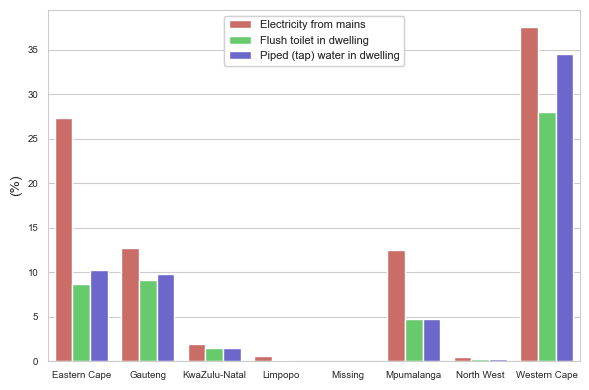

In [26]:
#

sns.set_palette("hls",3)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[6,4]
sns.set_style("whitegrid")

ax = sns.barplot(data=df_acc_long_g.drop([12,13,14]), x=df_acc_long_g.drop([12,13,14])['bl_hd_prov2011'], y='pct', hue='variable')
#ax = df_emp_g.plot.bar(stacked=True,grid=True, table=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
plt.title('', fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=7,rotation='horizontal')
plt.yticks(fontsize=7)

#ax = sns.catplot(data=df_acc_long_g, col='Q:', x='pct', y='bl_hd_prov2011', col_wrap=3, height=4,kind='bar')
#(ax.set_axis_labels("(%)",""))
#table = ax.tables[0]
#plt.title('', fontsize=12)
#plt.title('Access', fontsize=12)
plt.ylabel('(%)')
#plt.xlabel('')
#plt.xticks(fontsize=7)
#plt.yticks(fontsize=7)

##legends
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(loc='upper center', fontsize=8)
plt.gca().add_artist(col_lgd)

#Table
'''tableRowLength = len(df_acc_g.columns)
tableColLength = len(df_acc_g.index)
cellWidth = table.get_celld()[(1,1)].get_width()
cellHeight = table.get_celld()[(1,1)].get_height()
for cIx in range(0, tableColLength):
    c= table.add_cell(tableRowLength + 1, cIx, cellWidth, cellHeight)
    c.set
    c.get_text().set_text(df_acc_g.iloc[cIx].sum())'''

plt.savefig("hh_access_1.svg")
plt.show()

plt.close()


#### HOUSEHOLD GOODS

#### FOOD SECURITY

In [29]:
df_fs_0 = df_hh_1[["claim_id","bl_hhid",'bl_hd_prov2011','bl_h_fayn', 'bl_h_fatwo', 'bl_h_facont','bl_h_fatom']]
df_fs = pd.get_dummies(df_fs_0, prefix=['fayn','fatwo','facont','fatom'],prefix_sep='.', columns=['bl_h_fayn', 'bl_h_fatwo', 'bl_h_facont','bl_h_fatom'])
#df_fs

df_fs = df_fs.rename(columns={"fayn.Yes":"Household skipped meals in last month", 'fatwo.No':'Household usually eats less than 2 meals a day','facont.No':"Household usually eats less than their fill" , 'fatom.No': "Household does not have enough food for tomorrow"})
#df_fs_g = df_fs[['Household skipped meals in last month','Household usually eats less than 2 meals a day', 'Household usually eats less than their fill',"Household does not have enough food for tomorrow", 'bl_hd_prov2011']].groupby(['bl_hd_prov2011']).sum()

#df_fs = df_fs.rename(columns={"fayn.Yes":"Household members skipped meals in last month due to lack of access", 'fatwo.No':'Household members regularly eat less than 2 meals a day','facont.No':"Household members usually eat less than their fill each day" , 'fatom.No': "Food currently in household is not enough for tomorrow's meals"})
#df_fs_g = df_fs[['Household members skipped meals in last month due to lack of access','Household members regularly eat less than 2 meals a day',"Food currently in household is not enough for tomorrow's meals","Household members usually eat less than their fill each day", 'bl_hd_prov2011']].groupby(['bl_hd_prov2011']).sum()

df_fs_long = pd.melt(df_fs, id_vars=['claim_id','bl_hhid','bl_hd_prov2011'], value_vars=['Household skipped meals in last month','Household usually eats less than 2 meals a day', 'Household usually eats less than their fill',"Household does not have enough food for tomorrow"])
#df_fs_long

In [30]:

df_fs_ct = pd.crosstab(index=df_fs_0['bl_h_fayn'], columns=[df_fs_0['bl_hd_prov2011']], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_fayn')]  + "\n")
df_fs_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

--------
Question: g1 - Household members skipped meals/eaten less preferred food in last month?



,Eastern Cape,Gauteng,KwaZulu-Natal,Limpopo,Missing,Mpumalanga,North West,Western Cape,Total
,,,,,,,,,
Don't know,0.00%,0.00%,0.00%,0.00%,0.15%,0.00%,0.00%,0.15%,0.31%
No,29.82%,11.77%,1.99%,0.92%,1.07%,13.00%,0.46%,34.10%,93.12%
Refused,0.00%,0.15%,0.00%,0.00%,0.00%,0.00%,0.00%,0.31%,0.46%
Yes,0.46%,1.38%,0.00%,0.00%,0.00%,0.61%,0.00%,3.67%,6.12%
Total,30.28%,13.30%,1.99%,0.92%,1.22%,13.61%,0.46%,38.23%,100.00%


In [31]:
df_fs1=df_hh_1[['bl_h_fayn']]

df_fs1_g = df_fs1.groupby(['bl_h_fayn']).value_counts().rename('count').reset_index()
df_fs1_g['fs1_pct'] = df_fs1_g['count']/sum(df_fs1_g['count'])*100
df_fs1_g

,bl_h_fayn,count,fs1_pct
0,Don't know,2,0.305810
1,No,609,93.119266
2,Refused,3,0.458716
3,Yes,40,6.116208


In [32]:

df_fs_ct = pd.crosstab(index=df_fs_0['bl_h_fatwo'], columns=[df_fs['bl_hd_prov2011']], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_fatwo')]  + "\n")
df_fs_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

--------
Question: g10 - Do all household members regularly eat at least 2 meals a day?



,Eastern Cape,Gauteng,Mpumalanga,Western Cape,Total
,,,,,
No,0.00%,5.00%,5.00%,15.00%,25.00%
Yes,7.50%,17.50%,5.00%,45.00%,75.00%
Total,7.50%,22.50%,10.00%,60.00%,100.00%


In [33]:
df_fs2=df_hh_1[['bl_h_fatwo']]

df_fs2_g = df_fs2.groupby(['bl_h_fatwo']).value_counts().rename('count').reset_index()
df_fs2_g['fs1_pct'] = df_fs2_g['count']/sum(df_fs2_g['count'])*100
df_fs2_g

,bl_h_fatwo,count,fs1_pct
0,No,10,25.0
1,Yes,30,75.0


In [34]:

df_fs_ct = pd.crosstab(index=df_fs_0['bl_h_facont'], columns=[df_fs_0['bl_hd_prov2011']], rownames=[""], colnames=[""], margins=True, margins_name="Total", normalize=True)
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_facont')]  + "\n")
df_fs_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')

--------
Question: g11 - Do all household members usually eat until they are content each day?



,Eastern Cape,Gauteng,Mpumalanga,Western Cape,Total
,,,,,
No,0.00%,12.50%,2.50%,25.00%,40.00%
Yes,7.50%,10.00%,7.50%,35.00%,60.00%
Total,7.50%,22.50%,10.00%,60.00%,100.00%


In [35]:
df_fs3=df_hh_1[['bl_h_facont']]

df_fs3_g = df_fs3.groupby(['bl_h_facont']).value_counts().rename('count').reset_index()
df_fs3_g['fs1_pct'] = df_fs3_g['count']/sum(df_fs3_g['count'])*100
df_fs3_g

,bl_h_facont,count,fs1_pct
0,No,16,40.0
1,Yes,24,60.0


In [36]:

df_fs_ct = pd.crosstab(index=df_fs_0['bl_h_fatom'], columns=[df_fs_0['bl_hd_prov2011']], rownames=[""], colnames=[""], margins=True, margins_name="Total")
print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + meta.column_labels[(meta.column_names).index('bl_h_fatom')]  + "\n")
df_fs_ct.astype(float).applymap(lambda x: str(format(x*100,'.2f'))+'%')
df_fs_ct

--------
Question: g13 - Enough food in home for tomorrowâ€™s meals?



,Eastern Cape,Gauteng,Mpumalanga,Western Cape,Total
,,,,,
Don't know,0,1,0,0,1
No,2,3,2,6,13
Yes,1,5,2,18,26
Total,3,9,4,24,40


In [38]:
df_fs4=df_hh_1[['bl_h_fatom']]

df_fs4_g = df_fs4.groupby(['bl_h_fatom']).value_counts().rename('count').reset_index()
df_fs4_g['fs1_pct'] = df_fs4_g['count']/sum(df_fs4_g['count'])*100
df_fs4_g

,bl_h_fatom,count,fs1_pct
0,Don't know,1,2.5
1,No,13,32.5
2,Yes,26,65.0


In [32]:
#df_fs_g1 = df_fs.groupby(['bl_hd_prov2011'])['Household members skipped meals in last month due to lack of access'].sum().rename('Household members skipped meals in last month due to lack of access (%)').groupby(level=0).transform(lambda x: x/x.sum())
#df_fs_g['f2'] = 100*df_fs['Household members regularly eat less than 2 meals a day']/df_fs.groupby('bl_hd_prov2011')['Household members regularly eat less than 2 meals a day'].transform('sum')
#df_fs_g['f3'] = 100*df_fs["Food currently in household is not enough for tomorrow's meals"]/df_fs.groupby('bl_hd_prov2011')["Food currently in household is not enough for tomorrow's meals"].transform('sum')
#df_fs_g['f4'] = 100*df_fs["Household members usually eat less than their fill each day"]/df_fs.groupby('bl_hd_prov2011')["Household members usually eat less than their fill each day"].transform('sum')
#df_fs_g['Household members skipped meals in last month due to lack of access (%)'] = df_fs_g['Household members skipped meals in last month due to lack of access'].groupby(level='bl_hd_prov2011').apply(lambda x:100*x/float(x.sum()))
#df_fs_g['Household members regularly eat less than 2 meals a day (%)'] = df_fs_g['Household members regularly eat less than 2 meals a day'].groupby(level='bl_hd_prov2011').apply(lambda x:100*x/float(x.sum()))
#df_fs_g["Food currently in household is not enough for tomorrow's meals (%)"] = df_fs_g["Food currently in household is not enough for tomorrow's meals"].groupby(level='bl_hd_prov2011').apply(lambda x:100*x/float(x.sum()))
#df_fs_g["Household members usually eat less than their fill each day (%)"] = df_fs_g["Household members usually eat less than their fill each day"].groupby(level='bl_hd_prov2011').apply(lambda x:100*x/float(x.sum()))


df_fs = df_fs.rename(columns={"fayn.Yes":"Household skipped meals in last month", 'fatwo.No':'Household usually eats less than 2 meals a day','facont.No':"Household usually eats less than their fill" , 'fatom.No': "Household does not have enough food for tomorrow"})
df_fs_g = df_fs[['Household skipped meals in last month','Household usually eats less than 2 meals a day', 'Household usually eats less than their fill',"Household does not have enough food for tomorrow", 'bl_hd_prov2011']].groupby(['bl_hd_prov2011']).sum()
df_fs_g = df_fs_g.drop("Missing")

print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + "\n")
print(meta.column_labels[(meta.column_names).index('bl_h_fayn')]  + "\n")
print(meta.column_labels[(meta.column_names).index('bl_h_fatwo')]  + "\n")
print(meta.column_labels[(meta.column_names).index('bl_h_facont')]  + "\n")
print(meta.column_labels[(meta.column_names).index('bl_h_fatom')] )

df_fs_g




--------
Question: 

g1 - Household members skipped meals/eaten less preferred food in last month?

g10 - Do all household members regularly eat at least 2 meals a day?

g11 - Do all household members usually eat until they are content each day?

g13 - Enough food in home for tomorrowâ€™s meals?


,Household skipped meals in last month,Household usually eats less than 2 meals a day,Household usually eats less than their fill,Household does not have enough food for tomorrow
bl_hd_prov2011,,,,
Eastern Cape,3,0,0,2
Gauteng,9,2,5,3
KwaZulu-Natal,0,0,0,0
Limpopo,0,0,0,0
Mpumalanga,4,2,1,2
North West,0,0,0,0
Western Cape,24,6,10,6


In [33]:

df_fs_1 = df_hh_1[['bl_h_fayn']]
no_obs = df_fs_1.bl_h_fayn.notnull().sum()
#print(no_obs)
df_fs_long_g = df_fs_long[['value', 'variable','bl_hd_prov2011']].groupby(['bl_hd_prov2011', 'variable']).sum().drop('Missing').reset_index()

df_fs_long_g['pct'] = df_fs_long_g['value']/no_obs*100
df_fs_long_g=df_fs_long_g.rename(columns={"variable": "Q:"})
df_fs_long_g

,bl_hd_prov2011,Q:,value,pct
0,Eastern Cape,Household does not have enough food for tomorrow,2,0.305810
1,Eastern Cape,Household skipped meals in last month,3,0.458716
2,Eastern Cape,Household usually eats less than 2 meals a day,0,0.000000
3,Eastern Cape,Household usually eats less than their fill,0,0.000000
4,Gauteng,Household does not have enough food for tomorrow,3,0.458716
5,Gauteng,Household skipped meals in last month,9,1.376147
6,Gauteng,Household usually eats less than 2 meals a day,2,0.305810
7,Gauteng,Household usually eats less than their fill,5,0.764526
8,KwaZulu-Natal,Household does not have enough food for tomorrow,0,0.000000
9,KwaZulu-Natal,Household skipped meals in last month,0,0.000000


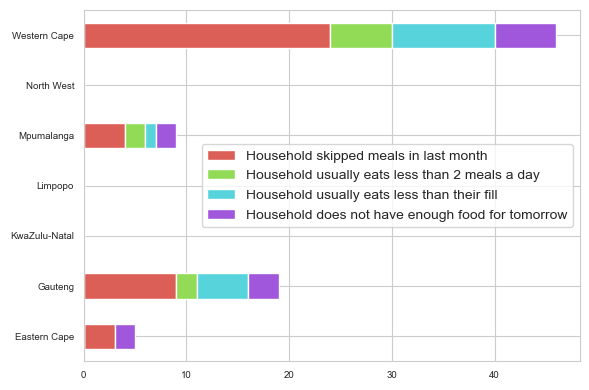

In [34]:
#

sns.set_palette("hls",4)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[6,4]
sns.set_style("whitegrid")

ax = df_fs_g.plot.barh(stacked=True)
#ax = df_emp_g.plot.bar(stacked=True,grid=True, table=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
plt.title('', fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=7,rotation='horizontal')
plt.yticks(fontsize=7)

#ax = df_fs_g.plot.barh(stacked=True)
#ax.axes.get_xaxis().set_visible(False)
#ax = sns.catplot(data=df_fs_long_g, col='Q:', x='pct', y='bl_hd_prov2011', col_wrap=4, height=4,kind='bar')
#(ax.set_axis_labels("(%)",""))
#table = ax.tables[0]
#plt.title('', fontsize=12)
#plt.title('Access', fontsize=12)
plt.ylabel('')
#plt.xlabel('')
#plt.xticks(fontsize=7)
#plt.yticks(fontsize=7)

##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(loc='center right', fontsize=8)
#plt.gca().add_artist(col_lgd)

#Table
'''tableRowLength = len(df_fs_g.columns)
tableColLength = len(df_fs_g.index)
cellWidth = table.get_celld()[(1,1)].get_width()
cellHeight = table.get_celld()[(1,1)].get_height()
for cIx in range(0, tableColLength):
    c= table.add_cell(tableRowLength + 1, cIx, cellWidth, cellHeight)
    c.set
    c.get_text().set_text(df_fs_g.iloc[cIx].sum())'''


plt.savefig("hh_foodsecure_2.svg")
plt.show()

plt.close()


#### DURABLE GOODS

#### CRIME AND SAFETY

In [35]:
df_hh_d_0 = df_hh_d.iloc[:, 0:10]
df_hh_x1 = pd.merge(df_hh_d_0,df_hh_x, how='outer', left_on=["claim_id","bl_hhid"],right_on=["claim_id","bl_hhid"])
#df_hh_x1.describe(include='all')

In [36]:
df_cs_0 = df_hh_x1[["claim_id","bl_hhid",'bl_hd_prov2011','bl_h_nbthmf','bl_h_freqdomvio', 'bl_h_freqvio', 'bl_h_freqgang','bl_h_freqmdr','bl_h_freqdrug']]
df_cs_0 = df_cs_0.replace(to_replace=[-9,-8, -5, -3], value= np.NaN)

df_cs = df_cs_0.rename(columns={'bl_h_nbthmf':"Theft and Burglary", 'bl_h_freqdomvio':'Domestic Violence','bl_h_freqvio':"Violence among different households" , 'bl_h_freqgang': "Gangsterism",'bl_h_freqmdr':'Murders, shootings or stabbings','bl_h_freqdrug':'Drug or alcohol abuse'})


df_cs_long = pd.melt(df_cs, id_vars=['claim_id','bl_hhid','bl_hd_prov2011'], value_vars=["Theft and Burglary",'Domestic Violence', "Violence among different households", "Gangsterism",'Murders, shootings or stabbings','Drug or alcohol abuse'])

print("--------" + "\n" + '\033[1m' + 'Question: ' + '\033[0m' + "\n")
print(meta.column_labels[(meta.column_names).index('bl_h_nbthmf')]  + "\n")
print(meta.column_labels[(meta.column_names).index('bl_h_freqdomvio')]  + "\n")
print(meta.column_labels[(meta.column_names).index('bl_h_freqvio')]  + "\n")
print(meta.column_labels[(meta.column_names).index('bl_h_freqgang')]  + "\n")
print(meta.column_labels[(meta.column_names).index('bl_h_freqmdr')]  + "\n")
print(meta.column_labels[(meta.column_names).index('bl_h_freqdrug')]  + "\n")


#df_hh_1_long
df_cs_long_pt = pd.pivot_table(df_cs_long, index=['variable'], columns=['bl_hd_prov2011'], values='value', aggfunc=np.mean, margins=True, margins_name="Total")
#print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + "Household Expenditure per Item" + "\n")
df_cs_long_pt


--------
Question: 

b37_1 - Frequency of theft and burglary in the neighbourhood

b37_2 - Frequency of domestic violence in the neighbourhood

b37_3 - Frequency of violence among different households in the neighbourhood

b37_4 - Frequency of gangsterism in the neighbourhood

b37_5 - Frequency of murders, shootings or stabbings in the neighbourhood

b37_6 - Frequency of drug or alcohol abuse in the neighbourhood



bl_hd_prov2011,Eastern Cape,Gauteng,KwaZulu-Natal,Limpopo,Missing,Mpumalanga,North West,Western Cape,Total
variable,,,,,,,,,
Domestic Violence,2.710660,2.632184,3.923077,2.333333,3.625000,2.379310,1.333333,2.245833,2.507020
Drug or alcohol abuse,4.086735,3.941860,4.692308,4.666667,3.875000,4.298851,5.000000,3.672199,3.959375
Gangsterism,2.934010,2.505882,3.769231,2.200000,2.875000,2.843373,1.333333,2.975806,2.884735
"Murders, shootings or stabbings",3.152284,3.000000,4.076923,2.833333,2.750000,3.318182,2.000000,3.024194,3.111111
Theft and Burglary,3.681818,3.298851,4.153846,4.000000,3.750000,3.647727,3.000000,3.712000,3.647779
Violence among different households,2.695431,2.586207,3.923077,2.666667,3.125000,2.264368,1.333333,2.426230,2.544186
Total,3.209814,2.994197,4.089744,3.142857,3.333333,3.128846,2.333333,3.012916,3.109848


In [37]:
#df_cs_tg = df_cs.loc[:,['bl_hd_prov2011','variable', 'value']].groupby(['bl_hd_prov2011','variable']).mean()
#df_cs_tg = df_cs_tg.drop("Missing")
#df_cs_tg = df_cs_tg.reset_index(drop=False)
df_cs_g = df_cs[["Theft and Burglary",'Domestic Violence', "Violence among different households", "Gangsterism",'Murders, shootings or stabbings','Drug or alcohol abuse', 'bl_hd_prov2011']].groupby(['bl_hd_prov2011']).mean()
df_cs_g = df_cs_g.drop("Missing")
#df_cs_g.astype(float).applymap(lambda x: format(x,'.2f'))
#df_cs_g

In [38]:

#print(no_obs)
df_cs_long_g = df_cs_long[['value', 'variable','bl_hd_prov2011']].groupby(['bl_hd_prov2011', 'variable']).mean().drop('Missing').reset_index()
df_cs_long_g=df_cs_long_g.rename(columns={"variable": "Q:"})
df_cs_long_g

,bl_hd_prov2011,Q:,value
0,Eastern Cape,Domestic Violence,2.710660
1,Eastern Cape,Drug or alcohol abuse,4.086735
2,Eastern Cape,Gangsterism,2.934010
3,Eastern Cape,"Murders, shootings or stabbings",3.152284
4,Eastern Cape,Theft and Burglary,3.681818
5,Eastern Cape,Violence among different households,2.695431
6,Gauteng,Domestic Violence,2.632184
7,Gauteng,Drug or alcohol abuse,3.941860
8,Gauteng,Gangsterism,2.505882
9,Gauteng,"Murders, shootings or stabbings",3.000000


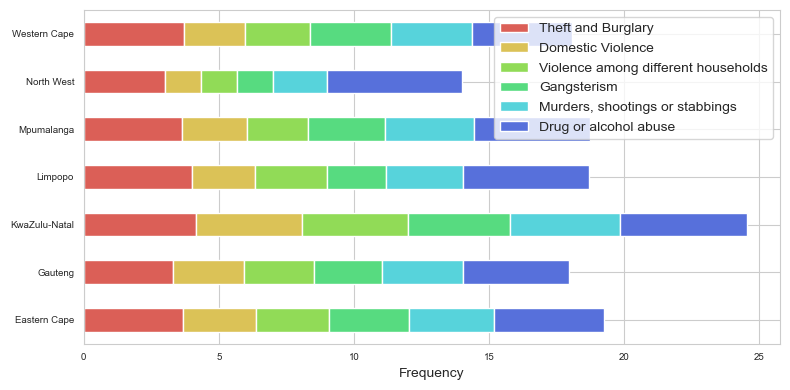

In [39]:
sns.set_palette("hls",8)
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[8,4]
sns.set_style("whitegrid")

ax = df_cs_g.plot.barh(stacked=True)
#ax = df_emp_g.plot.bar(stacked=True,grid=True, table=True)
#ax.axes.get_xaxis().set_visible(False)
#table = ax.tables[0]
plt.title('', fontsize=12)
plt.xlabel('Frequency')
plt.xticks(fontsize=7,rotation='horizontal')
plt.yticks(fontsize=7)

#ax = df_cs_g.plot.barh(stacked=True)
#ax = sns.catplot(data=df_cs_long_g, col='Q:', x='value', y='bl_hd_prov2011', col_wrap=6,kind='bar')
#(ax.set_axis_labels("Frequency",""))
#ax.axes.get_xaxis().set_visible(False)
#ax.xaxis.set_major_formatter(FormatStrFormatter('.2f'))
#table = ax.tables[0]
#plt.title('', fontsize=12)
plt.ylabel('')
#plt.xlabel('')
#plt.xticks(fontsize=7,rotation=45)
#plt.yticks(fontsize=7)
#ax.set_xticklabels(df_cs_g.astype(float).applymap(lambda x: str(format(x,'.2f'))))

##legends
#h,l = ax.get_legend_handles_labels()
#col_lgd = plt.legend(loc='upper right', fontsize=8)
#plt.gca().add_artist(col_lgd)

#Table
'''tableRowLength = len(df_cs_g.columns)
tableColLength = len(df_cs_g.index)
cellWidth = table.get_celld()[(1,1)].get_width()
cellHeight = table.get_celld()[(1,1)].get_height()

for cIx in range(1, tableColLength):
    for rIx in range(0, tableRowLength + 1):
        c= table.get_celld()[(cIx, rIx)]
        #table.get_celld()[(cIx, rIx)].set_width(cellWidth+0.01)
        #table.get_celld()[(cIx, rIx)].set_height(cellHeight+0.01)
        #print(c)
        cellText = c.get_text()
        #print(cellText)
        #print(df_cs_g.iloc[rIx,cIx-1])
        cellText.set_text(format(df_cs_g.iloc[rIx,cIx-1],'.2f'))

    
for cIx in range(0, tableColLength):
    c= table.add_cell(tableRowLength + 1, cIx, cellWidth, cellHeight)
    c.set
    c.get_text().set_text(format(df_cs_g.iloc[cIx].sum(),'.2f'))'''

plt.savefig("hh_crime_1.svg")
plt.show()

plt.close()

------------------------------------------------------
#### TOTAL HOUSEHOLD EXPENDITURE

In [40]:
df_hh_d_1 = df_hh_d_1.rename(columns={'bl_hd_expf':'Food', 'bl_hd_expnf':'Non-Food','bl_hd_rentexpend':'Rent','bl_hd_expenditure':'Total'})

df_hh_d_1_long = pd.melt(df_hh_d_1, id_vars=['claim_id','bl_hhid','bl_h_treatment'], value_vars=['Food', 'Non-Food', 'Rent', 'Total'])
#df_hh_d_1_long
df_hh_d_1_long_pt = pd.pivot_table(df_hh_d_1_long, index=['variable'], columns=['bl_h_treatment'], values='value', aggfunc=np.mean)
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + "Household Expenditure" + "\n")
df_hh_d_1_long_pt


--------
Outcome (derived): Household Expenditure



bl_h_treatment,Control,Treatment
variable,,
Food,2258.885133,2341.631269
Non-Food,6220.493270,5252.385027
Rent,1673.454761,2060.180696
Total,10890.245742,9755.166571


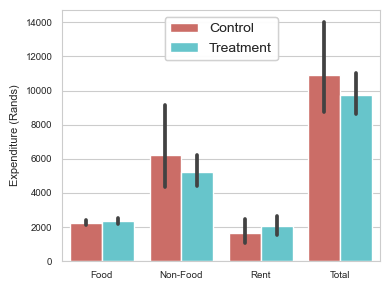

--------
Food: Monthly food expenditure with imputations

Non-Food: Monthly non-food expenditure with imputations

Rent: Monthly rental expenditure with imputations

Total: Total household monthly expenditure with imputations



In [41]:
plt.rcParams["figure.figsize"]=[4,3]
sns.set_palette("hls",2)
plt.rcParams["figure.autolayout"] =True
sns.set_style("whitegrid")
ax=sns.barplot(data=df_hh_d_1_long, y="value", x="variable", hue='bl_h_treatment')
#plt.title('Household Expenditure', fontsize=12)
plt.xlabel('')
plt.ylabel('Expenditure (Rands)',fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(loc='upper center')
plt.gca().add_artist(col_lgd)
plt.savefig("hh_consumption_3.svg")
plt.show()

print("--------" + "\n" + '\033[1m' + 'Food: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_expf')]  + "\n")
print('\033[1m' + 'Non-Food: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_expnf')]  + "\n")
print('\033[1m' + 'Rent: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_rentexpend')]  + "\n")
print('\033[1m' + 'Total: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_expenditure')]  + "\n")

--------------------------------------------------------
#### HOUSEHOLD EXPENDITURE PER ITEM

In [42]:
#Derived Consumption
df_hh_d_2 = df_hh_0.iloc[:, 0:6]
df_hh_d_2["Grains"] = df_hh_d[['bl_hd_fdmmspn','bl_hd_fdsmpspn',  'bl_hd_fdflrspn',  'bl_hd_fdricespn',  'bl_hd_fdpasspn', 'bl_hd_fdcerspn', 'bl_hd_fdbabyspn']].sum(axis=1)
df_hh_d_2["Sugar"] = df_hh_d[['bl_hd_fdbisspn', 'bl_hd_fdsugspn', 'bl_hd_fdsdspn']].sum(axis=1)
df_hh_d_2["Meat"] = df_hh_d[['bl_hd_fdrmspn', 'bl_hd_fdrmcspn', 'bl_hd_fdchispn', 'bl_hd_fdfshspn']].sum(axis=1)
df_hh_d_2["Pulses"] = df_hh_d[['bl_hd_fdvegdspn']].sum(axis=1)
df_hh_d_2["Fruit & Veg"] = df_hh_d[['bl_hd_fdpotspn', 'bl_hd_fdvegospn', 'bl_hd_fdfruspn', 'bl_hd_fdfrutspn', 'bl_hd_fdsoyspn']].sum(axis=1)
df_hh_d_2["Other Food"] = df_hh_d[['bl_hd_fdoilspn', 'bl_hd_fdmarspn', 'bl_hd_fdpbspn',  'bl_hd_fdmlkspn', 'bl_hd_fdeggspn', 'bl_hd_fdsltspn', 'bl_hd_fdcofspn', 'bl_hd_fdhmpspn', 'bl_hd_fdrdyspn', 'bl_hd_fdoutspn', 'bl_hd_fdospn']].sum(axis=1)
df_hh_d_2["Alcohol & Tobacco"] = df_hh_d[['bl_hd_nfcigspn', 'bl_hd_nfalcspn']].sum(axis=1)
df_hh_d_2["Hygiene"] = df_hh_d[['bl_hd_nfperspn', 'bl_hd_nfwshspn']].sum(axis=1)
df_hh_d_2["Transport"] = df_hh_d[['bl_hd_nftranspn']].sum(axis=1)
df_hh_d_2["Fuel"] = df_hh_d[['bl_hd_nfpetrspn']].sum(axis=1)
df_hh_d_2["Health"] = df_hh_d[['bl_hd_nfdocspn', 'bl_hd_nfhspspn', 'bl_hd_nfmedspn', 'bl_hd_nftradspn', 'bl_hd_nfhomspn', 'bl_hd_nfmedaidspn']].sum(axis=1)
df_hh_d_2["Education"] = df_hh_d[['bl_hd_nfinseduspn', 'bl_hd_nfschfeespn', 'bl_hd_nfschstatspn', 'bl_hd_nfschunispn', 'bl_hd_nfschospn']].sum(axis=1)
df_hh_d_2["Home"] = df_hh_d[['bl_hd_nfwatspn', 'bl_hd_nfelespn', 'bl_hd_nfenespn', 'bl_hd_nfmunspn', 'bl_hd_nflevspn', 'bl_hd_nfdwlspn', 'bl_hd_nfswimspn']].sum(axis=1)
df_hh_d_2["Other Non-Food"] = df_hh_d[['bl_hd_nfentspn', 'bl_hd_nfsprspn', 'bl_hd_nfjewspn', 'bl_hd_nfpapspn', 'bl_hd_nfcelspn', 'bl_hd_nftelspn', 'bl_hd_nflotspn', 'bl_hd_nfnetspn', 'bl_hd_nfcerspn', 'bl_hd_nfcarspn', 'bl_hd_nfinslspn', 'bl_hd_nfinsfspn', 'bl_hd_nfinsshspn', 'bl_hd_nfkitspn',  'bl_hd_nfbedspn', 'bl_hd_nfmatspn', 'bl_hd_nfmatspn', 'bl_hd_nffrnspn', 'bl_hd_nfmedaidspn', 'bl_hd_nfchldspn', 'bl_hd_nfrelspn', 'bl_hd_nfdomspn',  'bl_hd_nfpetsspn', 'bl_hd_nftoysspn', 'bl_hd_nfgftsspn', 'bl_hd_nflobspn']].sum(axis=1)
df_hh_d_2["Adult Clothing"] = df_hh_d[['bl_hd_nfclthspn', 'bl_hd_nfclthaspn', 'bl_hd_nfclthmspn']].sum(axis=1)


In [43]:
df_hh_d_2_long = pd.melt(df_hh_d_2, id_vars=['claim_id','bl_hhid','bl_h_treatment'], value_vars=['Grains', 'Sugar', 'Meat', 'Pulses', 'Fruit & Veg', 'Other Food', 'Alcohol & Tobacco', 'Hygiene', 'Transport', 'Fuel', 'Health', 'Education', 'Home', 'Other Non-Food', 'Adult Clothing'])
#df_hh_1_long
df_hh_d_2_long_pt = pd.pivot_table(df_hh_d_2_long, index=['variable'], columns=['bl_h_treatment'], values='value', aggfunc=np.mean, margins=True, margins_name="Total")
print("--------" + "\n" + '\033[1m' + 'Outcome (derived): ' + '\033[0m' + "Household Expenditure per Item" + "\n")
df_hh_d_2_long_pt

--------
Outcome (derived): Household Expenditure per Item



bl_h_treatment,Control,Treatment,Total
variable,,,
Adult Clothing,304.209142,280.769521,290.984034
Alcohol & Tobacco,177.104488,145.744985,159.410823
Education,142.691228,206.222222,178.536697
Fruit & Veg,244.104399,259.694762,252.900796
Fuel,521.351864,506.004745,512.692710
Grains,540.737687,509.565914,523.149943
Health,610.144125,611.711831,611.028656
Home,2523.014642,922.111835,1619.752967
Hygiene,266.582932,286.325914,277.722321


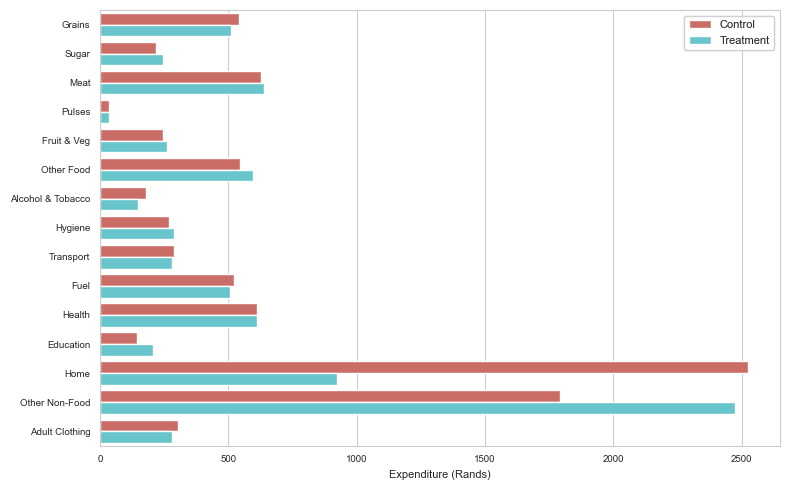

Grains: Amount Spent on mealie meal in last 30 days; Amount Spent on samp in last 30 days; Amount Spent on flour and bread in last 30 days; Amount Spent on rice in last 30 days; Amount Spent on pasta in last 30 days; Amount Spent on breakfast cereal and porridge in last 30 days; Amount Spent on baby food and baby formula in last 30 days

Sugar: Amount Spent on biscuits, cakes, rusks in last 30 days; Amount Spent on sugar, jam, honey, chocolates and sweets in last 30 days; Amount Spent on soft drinks and juices in last 30 days

Meat: Amount Spent on red meat in last 30 days; Amount Spent on canned red meat in last 30 days; Amount Spent on chicken in last 30 days; Amount Spent on fresh fish and shell fish in last 30 days

Pulses: Amount Spent on dried peas, lentils, beans in last 30 days

Fruit & Veg: Amount Spent on potatoes in last 30 days; Amount Spent on other vegetables in last 30 days; Amount Spent on fruits and nuts in last 30 days; Amount Spent on tinned fruit and vegetables in l

In [44]:

sns.set_palette(sns.set_palette("hls",2))
plt.rcParams["figure.autolayout"] =True
plt.rcParams["figure.figsize"]=[8,5]
sns.set_style("whitegrid")
ax=sns.barplot(data=df_hh_d_2_long, y="variable", x="value", hue='bl_h_treatment', ci=None)
#plt.title('Household Consumption per Item', fontsize=12)
plt.ylabel('')
plt.xlabel('Expenditure (Rands)',fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
##legends
h,l = ax.get_legend_handles_labels()
col_lgd = plt.legend(loc='upper right', fontsize=8)
plt.gca().add_artist(col_lgd)
plt.savefig("hh_consumption_item_3.svg")
plt.show()


print('\033[1m' + 'Grains: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdmmspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdsmpspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdflrspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdricespn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdpasspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdcerspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdbabyspn')]+ "\n")
print('\033[1m' + 'Sugar: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdbisspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdsugspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdsdspn')]+ "\n")
print('\033[1m' + 'Meat: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdrmspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdrmcspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdchispn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdfshspn')]+ "\n")
print('\033[1m' + 'Pulses: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdvegdspn')]+ "\n")
print('\033[1m' + 'Fruit & Veg: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdpotspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdvegospn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdfruspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdfrutspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdsoyspn')]+ "\n")
print('\033[1m' + 'Other Food": ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdoilspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdmarspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdpbspn')],  meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdmlkspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdeggspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdsltspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdcofspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdhmpspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdrdyspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdoutspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_fdospn')]+ "\n")
print('\033[1m' + 'Alcohol & Tobacco: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfcigspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfalcspn')]+ "\n")
print('\033[1m' + 'Hygiene: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfperspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfwshspn')]+ "\n")
print('\033[1m' + 'Transport: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nftranspn')]+ "\n")
print('\033[1m' + 'Fuel: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfpetrspn')]+ "\n")
print('\033[1m' + 'Health: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfdocspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfhspspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfmedspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nftradspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfhomspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfmedaidspn')]+ "\n")
print('\033[1m' + 'Education: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfinseduspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfschfeespn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfschstatspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfschunispn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfschospn')]+ "\n")
print('\033[1m' + 'Home: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfwatspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfelespn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfenespn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfmunspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nflevspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfdwlspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfswimspn')]+ "\n")
print('\033[1m' + 'Other Non-Food: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfentspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfsprspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfjewspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfpapspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfcelspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nftelspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nflotspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfnetspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfcerspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfcarspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfinslspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfinsfspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfinsshspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfkitspn')],  meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfbedspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfmatspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfmatspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nffrnspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfmedaidspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfchldspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfrelspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfdomspn')],  meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfpetsspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nftoysspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfgftsspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nflobspn')]+ "\n")
print('\033[1m' + 'Adult Clothing: ' + '\033[0m' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfclthspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfclthaspn')] + '; ' + meta_d.column_labels[(meta_d.column_names).index('bl_hd_nfclthmspn')]+ "\n")



In [ ]:
        
ws = pd.ExcelWriter('es_hh_3.xlsx', engine='xlsxwriter')
'''df_dwl_d_g.to_excel(ws, sheet_name='fig 2.7')
df_own_g.to_excel(ws, sheet_name='fig 2.8')
df_sub_g.to_excel(ws, sheet_name='fig 2.9')
df_lgr_g.to_excel(ws, sheet_name='fig 2.10')
df_acc_long_g.to_excel(ws, sheet_name='fig 2.11')
df_fs_long_g.to_excel(ws, sheet_name='fig 2.12')
df_cs_long_g.to_excel(ws, sheet_name='fig 2.13')
df_hh_d_1_long.to_excel(ws, sheet_name='fig 2.14')
df_hh_d_2_long.to_excel(ws, sheet_name='fig 2.15')'''
df_s_g.to_excel(ws, sheet_name='fig 2.6')
ws.save()

In [46]:
!jupyter-nbconvert --no-input --no-prompt --to html es_hh_1.ipynb

[NbConvertApp] Converting notebook es_hh_1.ipynb to html
[NbConvertApp] Writing 595312 bytes to es_hh_1.html
